In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
adv_stats_reg = pd.read_csv('data/advanced_stats.csv')
adv_stats_playoffs = pd.read_csv('data/advanced_stats_playoffs.csv')

reg_stats_reg = pd.read_csv('data/regular_stats.csv')
reg_stats_playoffs = pd.read_csv('data/regular_stats_playoffs.csv')

# jimmy butler was on 2 teams in 2019 so there are 2 regular season rows. Drop the second one
adv_stats_reg = adv_stats_reg.drop(adv_stats_reg.index[(adv_stats_reg['Player'] == 'Jimmy Butler') & (adv_stats_reg['Year'] == 2019)].tolist()[1])
reg_stats_reg = reg_stats_reg.drop(reg_stats_reg.index[(reg_stats_reg['Player'] == 'Jimmy Butler') & (reg_stats_reg['Year'] == 2019)].tolist()[1:])

# only look at Jimmy's stats
jimmy_butler = adv_stats_reg.loc[adv_stats_reg['Player'] == 'Jimmy Butler']
jimmy_butler_playoffs = adv_stats_playoffs.loc[adv_stats_playoffs['Player'] == 'Jimmy Butler']

jimmy_butler = jimmy_butler.sort_values(by='Year')
jimmy_butler_playoffs = jimmy_butler_playoffs.sort_values(by='Year')

# drop the 4th row of the jimmy_butler dataframe
jimmy_butler = jimmy_butler.drop(jimmy_butler.index[3])

# copy the PTS_Rank column over from reg_stats_reg to adv_stats_reg but match the years
jimmy_butler = jimmy_butler.merge(reg_stats_reg[['Year', 'Player', 'PTS']], on=['Year', 'Player'])
jimmy_butler_playoffs = jimmy_butler_playoffs.merge(reg_stats_playoffs[['Year', 'Player', 'PTS']], on=['Year', 'Player'])

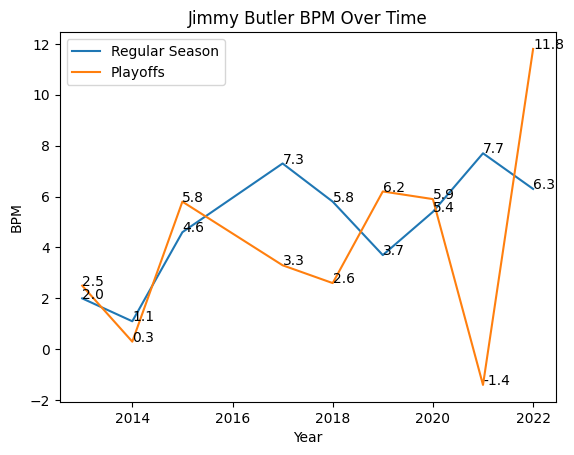

In [5]:
# label each point with the BPM rank
for i in range(len(jimmy_butler)):
    plt.annotate(jimmy_butler['BPM'].iloc[i], (jimmy_butler['Year'].iloc[i], jimmy_butler['BPM'].iloc[i]))

for i in range(len(jimmy_butler_playoffs)):
    plt.annotate(jimmy_butler_playoffs['BPM'].iloc[i], (jimmy_butler_playoffs['Year'].iloc[i], jimmy_butler_playoffs['BPM'].iloc[i]))

plt.plot(jimmy_butler['Year'], jimmy_butler['BPM'], label='Regular Season')
plt.plot(jimmy_butler_playoffs['Year'], jimmy_butler_playoffs['BPM'], label='Playoffs')
plt.legend()
plt.xlabel('Year')
plt.ylabel('BPM')
plt.title('Jimmy Butler BPM Over Time')
plt.savefig('plots/jimmy_butler_bpm.png')
plt.show()

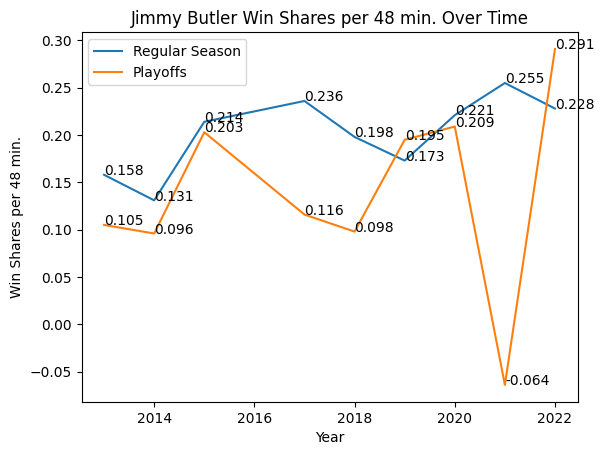

In [6]:
for i in range(len(jimmy_butler)):
    plt.annotate(jimmy_butler['WS/48'].iloc[i], (jimmy_butler['Year'].iloc[i], jimmy_butler['WS/48'].iloc[i]))

for i in range(len(jimmy_butler_playoffs)):
    plt.annotate(jimmy_butler_playoffs['WS/48'].iloc[i], (jimmy_butler_playoffs['Year'].iloc[i], jimmy_butler_playoffs['WS/48'].iloc[i]))

plt.plot(jimmy_butler['Year'], jimmy_butler['WS/48'], label='Regular Season')
plt.plot(jimmy_butler_playoffs['Year'], jimmy_butler_playoffs['WS/48'], label='Playoffs')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Win Shares per 48 min.')
plt.title('Jimmy Butler Win Shares per 48 min. Over Time')
plt.savefig('plots/jimmy_butler_ws48.png')
plt.show()

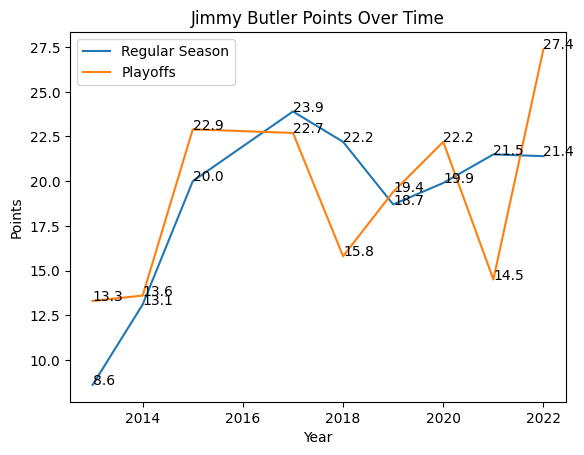

In [10]:
for i in range(len(jimmy_butler)):
    plt.annotate(jimmy_butler['PTS'].iloc[i], (jimmy_butler['Year'].iloc[i], jimmy_butler['PTS'].iloc[i]))

for i in range(len(jimmy_butler_playoffs)):
    plt.annotate(jimmy_butler_playoffs['PTS'].iloc[i], (jimmy_butler_playoffs['Year'].iloc[i], jimmy_butler_playoffs['PTS'].iloc[i]))

plt.plot(jimmy_butler['Year'], jimmy_butler['PTS'], label='Regular Season')
plt.plot(jimmy_butler_playoffs['Year'], jimmy_butler_playoffs['PTS'], label='Playoffs')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Points')
plt.title('Jimmy Butler Points Over Time')
plt.savefig('plots/jimmy_butler_pts.png')
plt.show()